In [2]:
%matplotlib notebook
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from IPython import display

 <font size = 5 color = brown> Fashion MNIST 
 <font size = 3 color = blue> you can have access to the Fashin MNIST directly from Tensorflow

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
#60000 images with 28x28 pixels in the range between 0 255 grayscale
display.display(train_images.shape)
#train label ---> This correspond with a number between 0-9 which difference each class of clothes 
display.display(train_labels)

(60000, 28, 28)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
#10000 images with 28x28 pixels in the range between 0 255 grayscale for TEST DATA
display.display(test_images.shape)
#test_labels (10000) ---> This correspond with a number between 0-9 which difference each class of clothes 
display.display(test_labels.shape)

(10000, 28, 28)

(10000,)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

'Ankle boot'

<IPython.core.display.Javascript object>


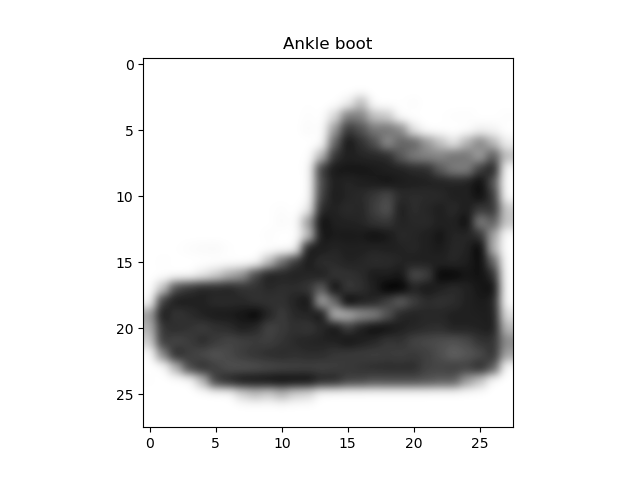

In [7]:
#First view to the data

image_number = 0

image = train_images[image_number]
label = class_names[train_labels[image_number]]
display.display(label)

def plot_One_image_clothe(image, label):
    figure_clothe = plt.figure('First view clothes')
    ax_clothe = figure_clothe.add_subplot(1,1,1)
    ax_clothe.clear()
    ax_clothe.set_title(label)
    ax_clothe.imshow(image, interpolation = 'gaussian', cmap = 'binary')
    plt.pause(0.01)
    
plot_One_image_clothe(image, label)

In [8]:
#Scale data

def scale_image_0_1(arrays_image):
    
    max_value = arrays_image.max()
    return arrays_image/ max_value
    

#Scale the image between 0 and 1    
train_images = scale_image_0_1(train_images)
test_images = scale_image_0_1(test_images)
    

<IPython.core.display.Javascript object>


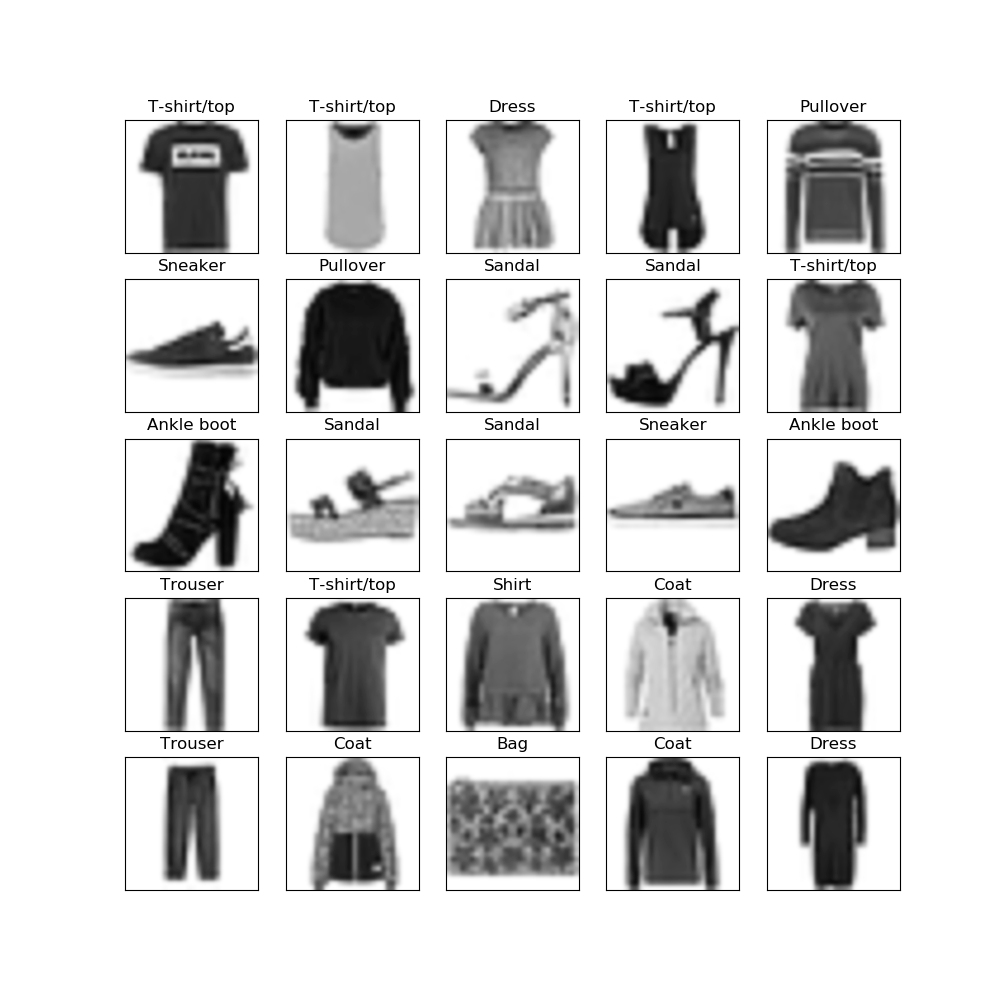

In [9]:
#In order to verify plot the first n images

def plot_25_images(image_arrays, label_arrays, class_names):
    "Plot the first n images"
    "   Input: image_arrays-- array like tensor with at least 25 images"
    "          labels ----> array with numbers which correspond with any in class_name"
    "           class_names ---> list with the class used to classify with labels   "
    "   Output figure with the image of the first n "
    
    plt.close('Fist 25 images')
    figure_images = plt.figure('Fist 25 images', figsize = (10,10))
    
    for i in range(1,26):
        ax_images = figure_images.add_subplot(5,5,i)
        ax_images.set_title(class_names[label_arrays[i]])
        ax_images.set_xticks([])
        ax_images.set_yticks([])
        ax_images.imshow(image_arrays[i], interpolation = 'gaussian', cmap ='binary')
        
    return figure_images
        
_ = plot_25_images(train_images, train_labels, class_names)

<font size = 3 color = darkviolet> The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [10]:
input_shape = (28, 28)


activation_layers_dict = {'relu' : 128, 'softmax': 10}
def model_Sequential_creation(input_shape, activation_layers_dict):
    
        "This function create a Sequential model with different layers defined in the input activation layer"
        "Inputs: input_shape is a tuple with the shape of the input data ex. input_shape = (28, 28)"
        
        "        activation_layers_dict is a dictionary with the number of neurons and the activation function:"
        "                            ex. activation_layers_dict = {'relu' : 128, 'softmax': 10} "
        layers = []
        layers.append(keras.layers.Flatten(input_shape = input_shape)) #This layer convert the array in an one-dimensional
                                                                        #array
        
        for activation in activation_layers_dict.keys():
            
            layers.append(keras.layers.Dense(activation_layers_dict[activation], activation = activation))
            
        model = keras.Sequential(layers)
        
        print('Model created! with: \ninput layers: Flatten...' + str(input_shape) +
              '\nhidden_layers: ' + str(activation_layers_dict))
        return model
    
    
model = model_Sequential_creation(input_shape, activation_layers_dict)

Model created! with: 
input layers: Flatten...(28, 28)
hidden_layers: {'relu': 128, 'softmax': 10}


<font color = blue> The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

<font size = 5 color = red >Compile the model

<font size = 3 color = blue >Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

<font size = 3 color = red >Loss function —<font size = 2 color = green >This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
    
<font size = 3 color = red >Optimizer —<font size = 2 color = green >This is how the model is updated based on the data it sees and its loss function.
    
<font size = 3 color = red >Metrics —<font size = 2 color = green >Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [11]:
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
def model_compile(model, optimizer, loss, metrics):
    "This function compile the model with the parameters optimizer, loss metrics"
    "Inputs : "
    "  optimizer --> optimizer. ex. 'adam'"
    "  loss ---> function try to minimize ex. 'sparse_categorical_crossentropy'"
    "   metrics---> Used for monitor the training and the test steps ex. ['accuracy'] "
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=metrics)
    print('Model compiled with: \n' + 'optimizer:...' + str(optimizer) +'\nloss:...' + str(loss) + '\nmetrics:...' + 
          str(metrics))
    return model

model = model_compile(model, optimizer, loss, metrics)

Model compiled with: 
optimizer:...adam
loss:...sparse_categorical_crossentropy
metrics:...['accuracy']


<font size = 5 color = red> Training Model
    
<font size = 2 color = blue> To start training, call the <font size = 2 color = red> model.fit <font size = 2 color = blue> method—so called because it "fits" the model to the training data

In [16]:
feature_train = train_images
target_train = train_labels
epochs = 10
def train_model(model, feature_train, target_train, epochs):
    "This function return the model trained"
    "Inputs:  feature_train --> array like ex. 28x28 arrays (with the model sequential creation the first layer"
    "                                                       convert that to one dimension array)"
    
    "          target_train ---> one dimension array like "
    "           epochs -----> numb"
    model.fit(feature_train, target_train, epochs=epochs)
    
    print('Model trained!')
    return model
model_trained = train_model(model, feature_train, target_train, epochs)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2282 - accuracy: 0.9155
Epoch 2/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2196 - accuracy: 0.9177
Epoch 3/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2137 - accuracy: 0.9197
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2062 - accuracy: 0.9231
Epoch 5/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2000 - accuracy: 0.9251
Epoch 6/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1968 - accuracy: 0.9263
Epoch 7/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.1904 - accuracy: 0.9285
Epoch 8/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1848 - accuracy: 0.9302
Epoch 9/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1813 - accuracy: 0.9325
Epoch 10/10
60

In [17]:


def model_evaluation(model, test_feature, test_target, verbose):
    
    test_loss, test_acc = model.evaluate(test_feature, test_target, verbose=verbose)
    print('The accuracy of the model is....:' + str(test_acc))
    return test_acc

verbose = 2
print('Evaluation in test')
model_evaluation(model_trained, test_images, test_labels, verbose)
print('Evaluation in training')
model_evaluation(model_trained, train_images, train_labels, verbose)

Evaluation in test
10000/1 - 0s - loss: 0.2334 - accuracy: 0.8890
The accuracy of the model is....:0.889
Evaluation in training
60000/1 - 1s - loss: 0.1542 - accuracy: 0.9418
The accuracy of the model is....:0.9418333


0.9418333

# Predictions

In [20]:
prediction = model_trained.predict(test_images) #predictions give you the probability of every article of clothes

In [23]:
np.argmax(prediction[0])

9

In [38]:
def model_predictions(model, feature_dataframe, give_high_prob_class = False):
    "Return the predictions confidence array or/and the class with the highest probability"
    "Input feature_dataframe: array with the input for the model"
    "                          give_high_prob_class if this is True the function return the class with highest "
    "                           probability"
    prediction = model.predict(feature_dataframe)
    
    class_highest = None
    if give_high_prob_class:
        
        class_highest = [np.argmax(prediction[i]) for i in range(feature_dataframe.shape[0])]
            
    return prediction, class_highest

prediction, class_highest = model_predictions(model_trained, test_images, give_high_prob_class = True)
display.display(class_highest)

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 8,
 3,
 4,
 1,
 2,
 2,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 6,
 7,
 6,
 7,
 2,
 1,
 2,
 6,
 4,
 2,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 3,
 3,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 7,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 6,
 2,
 1,
 2,
 5,
 1,
 6,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 2,
 1,
 3,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 3,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 8,
 4,
 0,
 7,
 7,
 6,
 6,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 4,
 2,
 2,
